In [1]:
#importing pandas and NumPY <3
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#importing Sklearn tools
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn import metrics

#importing data viz tools
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

        

/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv
/kaggle/input/unsupervised-learning-on-country-data/data-dictionary.csv


# DATA VIEW AND CLEANING

In [2]:
df = pd.read_csv('/kaggle/input/unsupervised-learning-on-country-data/Country-data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [3]:
#considering this dataset looks beautiful and clean (without null values), let's just prepare our data to apply Kmeans

#creating a copy from the dataset and drop the feature that will not be relevant for the K-means
dataframe = df.copy()
dataframe.drop(columns=['country'], inplace=True)
dataframe


,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


# DATA PREPROCESSING 

In [4]:
# Let's normalize all the features first

values = Normalizer().fit_transform(dataframe.values) 
print(values)

[[5.28625544e-02 5.86059362e-03 4.44232996e-03 ... 3.29365361e-02
  3.41086549e-03 3.24090827e-01]
 [1.54565929e-03 2.60713615e-03 6.09883634e-04 ... 7.10444600e-03
  1.53634809e-04 3.80828101e-01]
 [2.00006203e-03 2.81327406e-03 3.05503980e-04 ... 5.60456942e-03
  2.11728178e-04 3.26750061e-01]
 ...
 [4.97959888e-03 1.53876017e-02 1.46182216e-03 ... 1.56226900e-02
  4.16747546e-04 2.79968864e-01]
 [1.20589885e-02 6.42574875e-03 1.10951262e-03 ... 1.44579347e-02
  1.00027489e-03 2.80591029e-01]
 [2.31349866e-02 1.03007762e-02 1.63977221e-03 ... 1.44767666e-02
  1.50335653e-03 4.06463062e-01]]


# Applying K-Means

In [5]:
def clustering_algorithm(n_clusters, dataset):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski


In [6]:
#first lest check which n based on the main score (Silhoette, Davies - Bouldin and Calinski)

for i in range(3, 11):
    s, dbs, calinski = clustering_algorithm(i, values)
    print(i, s, dbs, calinski)

3 0.5198837827909313 0.600866931760727 458.3126427646605
4 0.4668632199420871 0.7198105851721268 439.95619985014906
5 0.49356364961886356 0.7149150273654393 415.51152737101586
6 0.47222025926012295 0.7357727247657255 443.93848139853344
7 0.47034321173528354 0.6986717401677555 457.1115533912653
8 0.42272520618294895 0.6918296876560636 464.81457412991244
9 0.42617324762132835 0.6338191681169065 467.16640445432273
10 0.4334709237858513 0.6626565588532441 485.3757251606794


In [7]:
# Considering Silhoette as the main metric, 3 clusters show the best score in comparison with all the others N. 
# Also it is align with the commons sense in terms of the country's economic segmentation (developing developed and underdeveloped) link: https://en.wikipedia.org/wiki/Developing_country. 
# So let's check if K-means were able to separate all those countries by itself, but first let's run some more tests

In [8]:
#First, let's compare with a random sample to understand how far this model looks good in comparison with a random world. 

random_data = np.random.rand(167,9)
s_random, dbs_random, calinski_random = clustering_algorithm(3, random_data)
s, dbs, calinski = clustering_algorithm(3, values)

print(s_random, dbs_random, calinski_random)
print(s, dbs, calinski)

#It's way more accurate, which is good!

0.09509950613252639 2.5017553706741507 17.435057888282174
0.5198837827909313 0.600866931760727 458.3126427646605


In [9]:
# Then let's test the stabilization (how consistent) this segmentation is if we split the sample into 3 parts. 

set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algorithm(3, set1)
s2, dbs2, calinski2 = clustering_algorithm(3, set2)
s3, dbs3, calinski3 = clustering_algorithm(3, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

#It looks fluctuates around in the same range for all metrics. It's also very good!

0.5099002406186719 0.6176771695644532 163.35312834956085
0.5355580436538645 0.5880283946904726 188.30786716669212
0.5657004742226224 0.5356671502718752 142.91946826594048


# Data Insights

In [10]:
kmeans = KMeans(n_clusters=3, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)
labels = kmeans.labels_

df['labels'] = labels


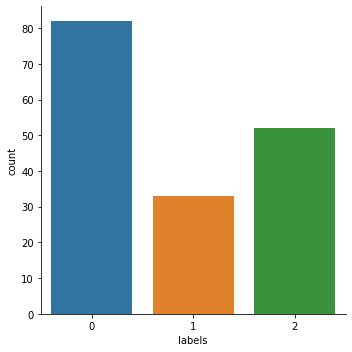

In [11]:
sns.catplot(x='labels', kind='count', data=df)

In [12]:
#It is important to get the features that the centroids have the most significant variance. 
# So, we can see how each feature is important for the segmentation's composition
centroids = kmeans.cluster_centers_
print(centroids)

[[2.65698003e-02 7.83591318e-03 2.09647839e-03 1.38388435e-02
  9.28546308e-01 2.75256412e-03 1.91114548e-02 1.44277188e-03
  3.62757939e-01]
 [1.89973424e-03 1.41159823e-03 5.18643396e-04 2.90914866e-03
  6.78742436e-01 3.45565877e-04 3.63893463e-03 1.78818699e-04
  7.29344202e-01]
 [8.42918330e-03 5.13419276e-03 8.04677579e-04 6.63167707e-03
  8.58474169e-01 1.28772230e-03 8.40689071e-03 5.51309664e-04
  5.08823371e-01]]


In [13]:
max = len(centroids[0])
for i in range(max):
    print(dataframe.columns.values[i],"\n{:.4f}".format(centroids[:, i].var()))
    
#So the most significant features is Net income per person and The GDP per capita, wich is a good coincidence because allow us to use 2d chats :)

child_mort 
0.0001
exports 
0.0000
health 
0.0000
imports 
0.0000
income 
0.0111
inflation 
0.0000
life_expec 
0.0000
total_fer 
0.0000
gdpp 
0.0227


In [14]:
df_0 = df[df['labels'] == 0]
df_1 = df[df['labels'] == 1]
df_2 = df[df['labels'] == 2]

<function matplotlib.pyplot.show(close=None, block=None)>

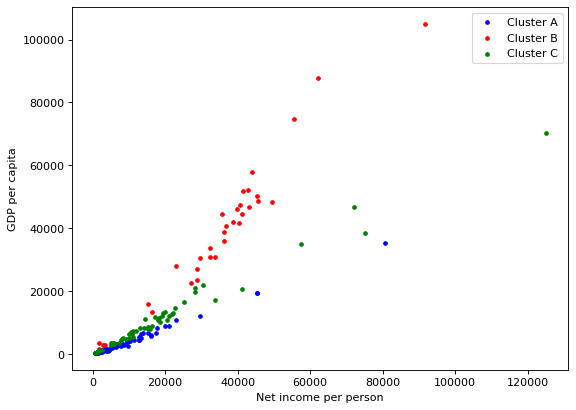

In [15]:
plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(df_0['income'], df_0['gdpp'], c='blue', s=10, label='Cluster A')
plt.scatter(df_1['income'], df_1['gdpp'], c='red', s=10, label='Cluster B')
plt.scatter(df_2['income'], df_2['gdpp'], c='green', s=10, label='Cluster C')

plt.xlabel('Net income per person')
plt.ylabel('GDP per capita')
plt.legend(),
plt.show


Is it possible to see all the tree groups:
*     Cluster A: Lower net income per person and The GDP per capita. 
*     Cluster B: Highest et income per person and The GDP per capita
*     Cluster C: Medium et income per person and The GDP per capita


We can see in this chart the most significant change in the segmentation is the inclining between those two variables.


Which, in my understanding, means that the most significant difference between those 3 groups is how those countries can, as the economic production grows, the population in general feels this growth in terms of Net income. 

In [16]:
clusters_name = {0: 'Cluster A', 1: 'Cluster B', 2: 'Cluster C'}
df['labels'] = df['labels'].map(clusters_name)

fig = px.choropleth(df,
                    locationmode='country names',
                    locations='country',
                    color='labels',
                    title='Coutries by labels'
                   )
fig.show()

In [17]:
description = df.groupby("labels")['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'labels']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

           child_mort    exports    health    imports        income  \
labels                                                                
Cluster A   55.420732  33.628037  6.010732  43.103243   8538.829268   
Cluster B   10.545455  42.875758  9.866667  45.257576  34696.060606   
Cluster C   28.819231  51.784615  6.148846  53.898077  19577.096154   

           inflation  life_expec  total_fer          gdpp  n_clients  
labels                                                                
Cluster A  10.554524   66.456098   3.466585   3494.060976         82  
Cluster B   3.503455   78.403030   2.103333  38552.121212         33  
Cluster C   6.124635   72.040385   2.666154  11659.250000         52  


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Cluster's description:

Cluster A:
* Highest Death of children under 5 years of age per 1000 live births
* Lowest Exports of goods and services per capita.
* Lowest Total health spending per capita.
* Highest The measurement of the annual growth rate of the Total GDP
* Lowest life expectation
* Lowest The GDP per capita. 

Cluster B:
* Lowest Death of children under 5 years of age per 1000 live births
* Highest Total health spending per capita.
* Highest Net income per person
* Lowest The measurement of the annual growth rate of the Total GDP
* Highest life expectation
* Highest The GDP per capita. 


Cluster C:
* Highest Exports of goods and services per capita.
* Highest Imports of goods and services per capita.




# Conclusion

Clearly, we can see that K-means were able to separate all those countries into a logic based on the features. Cluster A with countries with the worst indices of health, mortality, and net income. Cluster B going for the opposite side with countries with the best metrics. Cluster B with the ordinary countries with average indices. 

Of course with only a single observation of those metrics and not considering more complex contexts like political influence and economic insertion into the global value chain, K-mean hasn't been able to actually put all the BRICS, for example, into the Cluster C. 

China, India and Russia, for example, were tagged in the same bunch of all the underdeveloped countries. Which we know isn't a good comparison especially due to the economic size and political influence, even though some metrics stay similar to all the other countries of the same cluster.

As we could see, the significant difference between the clusters is how they are able to, from the size of GPD per capita, actually improve the Net income per person. Which, in my point of view, it impacts all the other metrics and that's why some BRICS isn't in the group C. Because, even though their economic size and political influence, those countries wasn't able to improve their population's quality of life (considering only this observation, of course)
